<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Exploração e análise de dados de crédito com SQL**
Caderno do **Projeto**<br>
[Luiz Felipe](https://www.linkedin.com/in/luiz-felipe-gomes-de-carvalho-29184a20a/)

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Exploração de Dados | Tabela e Queries SQL;</li>
  <li>Conclusão</li>
  <li>Visualização Interativa de Dados.</li>
</ol>

## 1\. Introdução

### **1.1. TLDR**

- **Dashboard**:
 - [Power BI](https://app.powerbi.com/view?r=eyJrIjoiMmNmZDg5ZjQtZmMxZC00NmQxLWFhM2EtYjA0ZjQ3NzU5NjRlIiwidCI6ImU4Y2YyNjM5LTFmOTgtNGJiNC1iZDg5LWFiZDE0OTI4OTM3ZiJ9)

- **Processamento**:
 - [Kaggle Notebook](https://www.kaggle.com/code/luizfelipeh/projeto-ebac-sql)

- **Fontes**:
 - A tabela foi criada no **AWS Athena** junto com o **S3 Bucket** com uma versão dos dados disponibilizados em: [GitHub André Perez](https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset)



### **1.2. Dados**

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

- idade = idade do cliente
- sexo = sexo do cliente (F ou M)
- dependentes = número de dependentes do cliente
- escolaridade = nível de escolaridade do clientes
- estado_civil = estado civil do cliente
- salario_anual = faixa salarial do cliente
- tipo_cartao = tipo de cartao do cliente
- qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
- iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
- meses_inativo_12m = quantidade de meses que o cliente ficou inativo
- limite_credito = limite de credito do cliente
- valor_transacoes_12m = valor das transações dos ultimos 12 meses
- qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

## 2\. Exploração de Dados | Tabela e Queries SQL

###2.1. Criação da tabela `credito` no **AWS Athena**:

A query utilizada para a criação da tabela:


```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string,
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION 's3://bucket-projeto-transacoes-lf/'
TBLPROPERTIES ('has_encrypted_data'='false');
```



###2.2. **Apresentação dos dados:**

Nessa primeira etapa, vamos conhecer um pouco dos dados da nossa tabela de credito.

- 1° Query:


 ```sql
select * from credito limit 10;
```

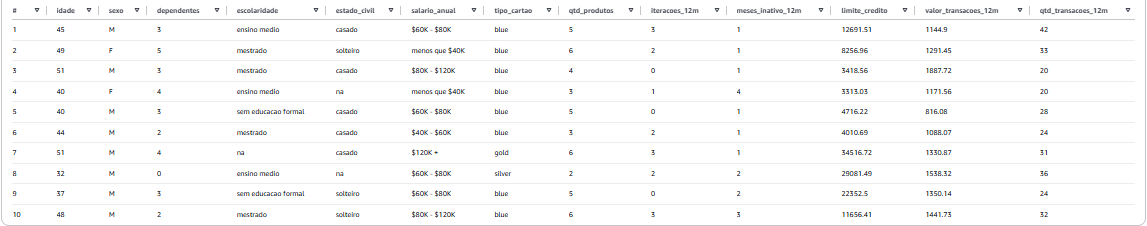

> Como mostra a tabela acima, é possível ver a existência de alguns valores nulos (na).

### 2.3. **Quantidade de dados disponíveis:**

Também é importante saber a quantidade de linhas que temos no nosso dataset

* 2° Query:

```sql
select count(*) from credito
```

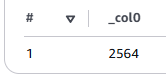

> Ao total temos 2564 linhas na nossa tabela `credito`.

### 2.4. **Os tipos de cada dado:**

É importate saber os tipos de dados de cada coluna no dataset. Se é do tipo `int` (númeor inteiro), se é do tipo `float` (números com casas decimais) ou se é do tipo `string`(sequências de caracteres, ou seja, texto). Lembrando que existem outros tipos.

* 3° Query:

```sql
DESCRIBE credito
```

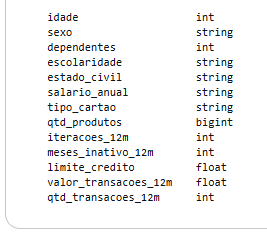

> Podemos observar que a tabela possui dados do tipo `int`, `float` e `string`.


### 2.5. **Tipos de escolaridade no dataset:**

Nesta query queremos saber quais os tipos de formações academicas nossos cliente do dataset possuem.

* 4° Query:

```sql
SELECT escolaridade, COUNT(*) AS quantidade_pessoas  
FROM credito  
GROUP BY escolaridade;  
```

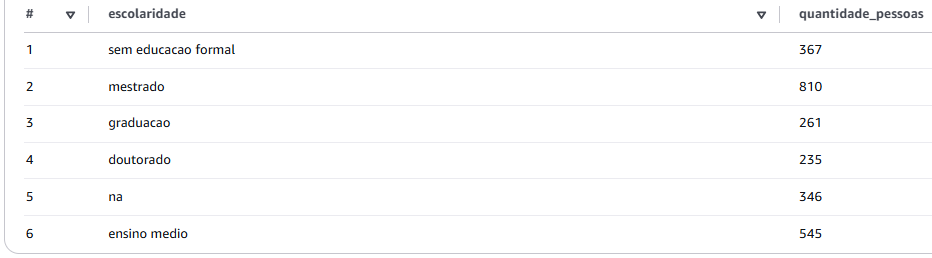

> Podemos observar que a maioria dos clientes possui Mestrado (810 pessoas), seguido por Ensino Médio (545 pessoas) e Graduação (261 pessoas). Agora um número bem relevante está sem informação (na).

### 2.6. Tipos de sálarios anuais no dataset:

Aqui queremos saber a quantidade de pessoas por faixa salárial.

* 5° Query:

```sql
SELECT count(*) AS quantidade_pessoas, salario_anual
FROM credito
GROUP BY salario_anual
```

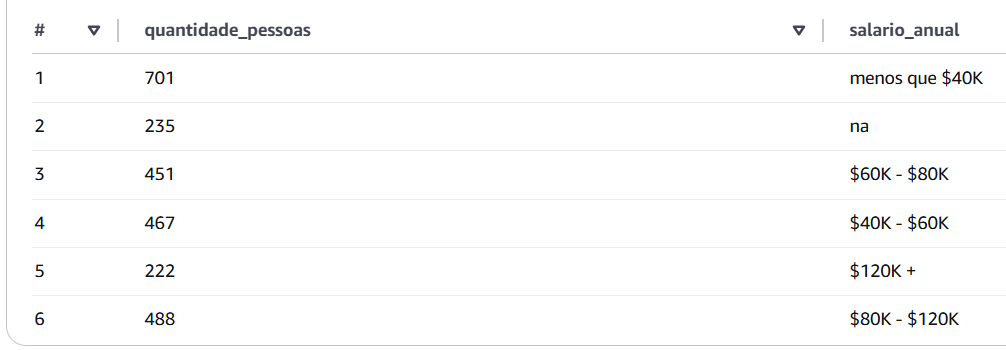

> Podemos observar que a maioria das pessoas do nosso banco recebem menos de 40k por ano (701 pessoas). Agora os que recebem entre 40K a 60K, 60K a 80K e também os que recebem de 80K a 120K, a quantidade de pessoas é muito parecida (467, 451 e 488 respectivamente). Agora os maiores sálarios anuais do nosso banco (120k +) é concentrado ao um número menor de pessoas, 222 pessoas para ser exato. Lembrando também, que existe 235 valores nulos nessa.

###2.7. Quantidade de pessoas por sexo:

Nesta consulta, queremos saber a quantidade de homens e mulheres temos no dataset.

* 6° Query:

```sql
SELECT count(*) AS quantidade_pessoas, sexo
FROM credito
GROUP BY sexo
```

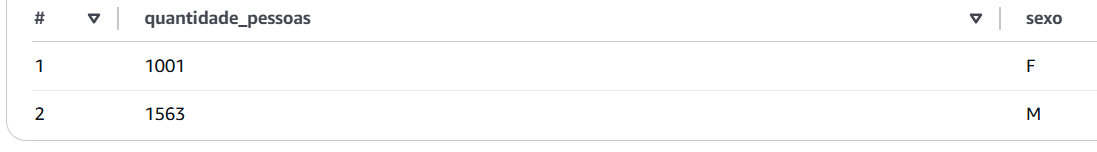

> Observamos que o número de homens em nosso banco de dados (1.563) é significativamente maior do que o de mulheres (1.001). Essa diferença pode refletir não apenas a composição da amostra, mas também fatores sociais, como a desigualdade de oportunidades entre homens e mulheres na sociedade.

###2.8. Relação do limite de crédito com outras variáveis:

Aqui queremos saber a relação do limite de crédito do cliente com base na sua escolaridade, tipo de cartão e sexo.

* 7° Query:

```sql
SELECT max(limite_credito) AS limite_credito, escolaridade, tipo_cartao, sexo FROM credito
WHERE escolaridade != 'na' and tipo_cartao != 'na'
GROUP BY escolaridade, tipo_cartao, sexo
ORDER BY limite_credito DESC
LIMIT 10
```

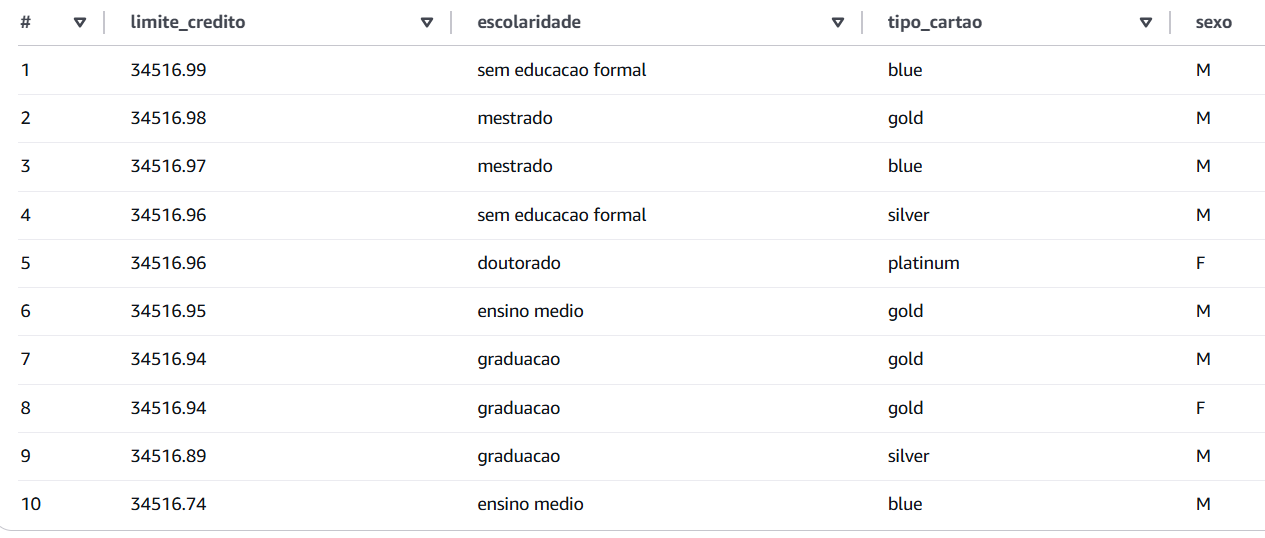

> Podemos observar que o tipo de escolaridade não interfere muito no limite de crédito do cliente, assim como também o tipo de cartão não parece ter muita relação. Já em relação ao sexo, parece que existe uma grande diferença entre homens e mulheres. Os homens possuem os maiores limites.

###2.9. Maior, Média e menor valor gasto por sexo:

Aqui queremos saber qual foi o maior valor gasto, a média de valores gasto e também o menor valor gasto entre homens e mulheres.

* 8° Query:

```sql
SELECT max(valor_transacoes_12m) AS maior_valor_gasto, avg(valor_transacoes_12m) AS media_valor_gasto, min(valor_transacoes_12m) AS min_valor_gasto, sexo
FROM credito
GROUP BY sexo
```

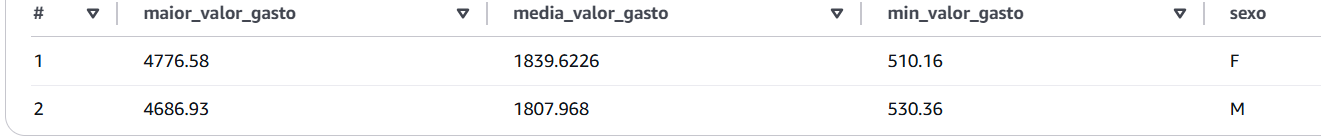

> Nessa query, podemos ver que entre os maiores valores gasto, a média e também o menor valor gasto dividido por homens e mulheres, são praticamente os mesmos.

###2.10. Média de transações por sexo e sálario:

Aqui queremos saber a média da quantidade de produtos comprados dos últimos 12 meses, a média do valor das transações dos últimos 12 meses e também a médida do limite de crédito do cliente. Tudo isso agrupado por sexo e salário anaul.

* 9° Query:

```sql
SELECT avg(qtd_produtos) AS qts_produtos, avg(valor_transacoes_12m) AS media_valor_transacoes, avg(limite_credito) AS media_limite, sexo, salario_anual
FROM credito
WHERE salario_anual != 'na'
GROUP BY sexo, salario_anual
ORDER BY avg(valor_transacoes_12m) DESC
```

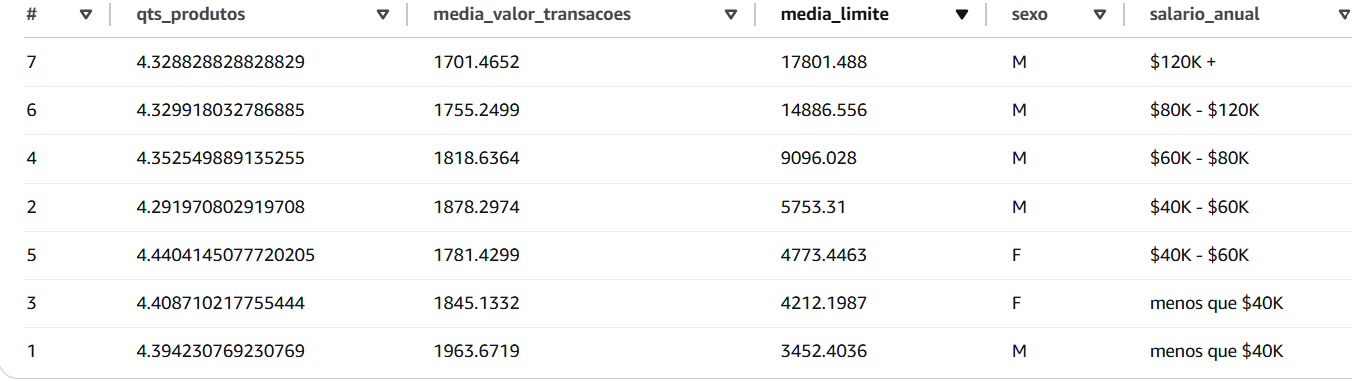

> Podemos observar que o sexo e salário anual impacta diretamente com o limite de crédito, sendo assim, os homens com os maiores salários do banco, possuem os maiores limites. Já com relação a quantidade de produtos e média de trasações, não parecem impactar muito.

## 3\. Conclusão

Essas foram algumas análises obtidas a partir do dataset de crédito.

📊 Principais insights:

* A maioria dos clientes possui uma renda anual de até 40K.
* O público predominante é masculino.
* O nível de escolaridade não parece influenciar no limite de crédito nem no tipo de cartão.
* Os clientes com maiores limites são, em sua maioria, homens.
* Já os clientes com menores limites são, na maior parte, mulheres.
* Nenhum dos clientes com menores limites possui um cartão platinum.
* A faixa salarial tem um impacto direto no limite de crédito concedido.
* Não há mulheres no grupo de clientes com salário anual acima de 60K.

## 4\. Visualização Interativa de Dados

Utilizamos o Power BI para criar uma visualização interativa dos dados do dataset. Te convido a explorar o dashboard e descobrir insights interessantes!

[Análise de Dados de Crédito](https://app.powerbi.com/view?r=eyJrIjoiMmNmZDg5ZjQtZmMxZC00NmQxLWFhM2EtYjA0ZjQ3NzU5NjRlIiwidCI6ImU4Y2YyNjM5LTFmOTgtNGJiNC1iZDg5LWFiZDE0OTI4OTM3ZiJ9)

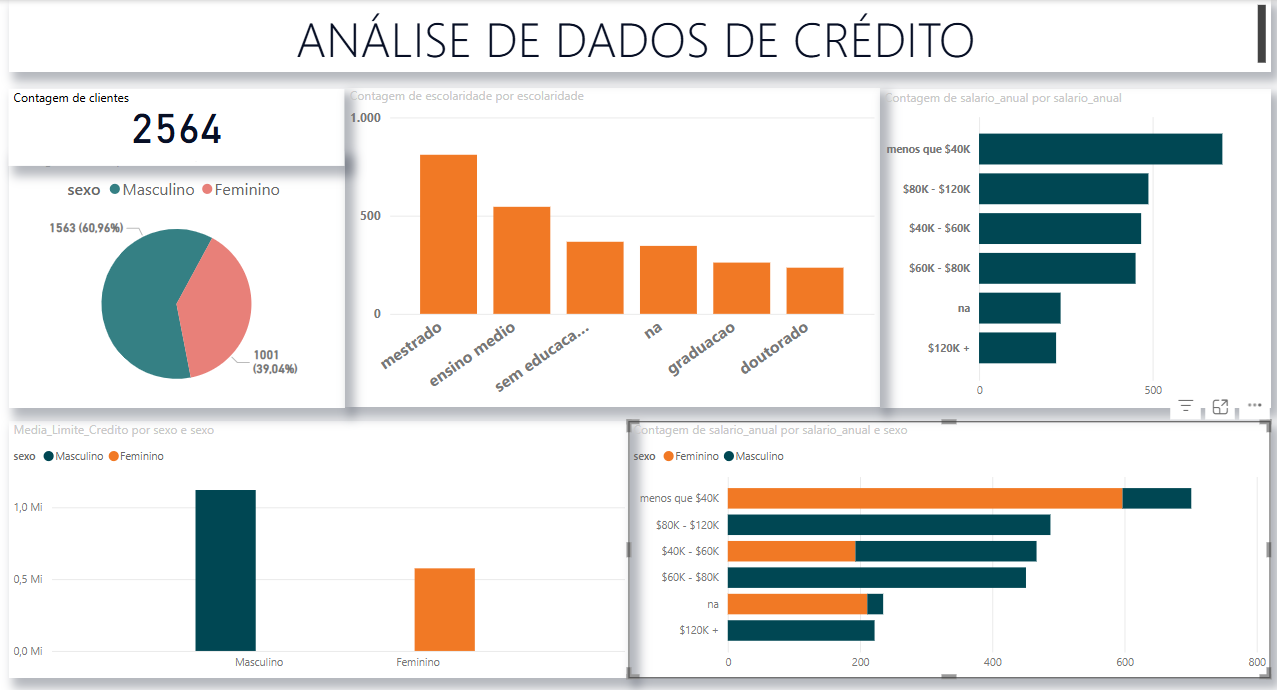